In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.relativedelta import relativedelta

In [46]:
df = pd.read_json('ultimate_data_challenge.json')

In [47]:
df.head()
df.last_trip_date = pd.to_datetime(df['last_trip_date'])
df.signup_date = pd.to_datetime(df['signup_date'])

#### What is Active? 
We define an active user as anyone who has used the app within the last 30 days.

In [48]:
#Assume that the latest entry into the last_trip_date column indicates the "current date" for the lookback period.
latest_trip_date     = df.last_trip_date.max()
earliest_signup_date = df.signup_date.min()

In [49]:
#active_30 will contain boolean entries for whether the user has taken a ride in the last 30 days
active_30 = df.last_trip_date >= (latest_trip_date - relativedelta(days=+30))
df['active_30'] = active_30

In [50]:
active_30.value_counts()


False    31196
True     18804
Name: last_trip_date, dtype: int64

In [51]:
print('The dataset contains', active_30.loc[active_30 == True].count(), 'active users out of', len(active_30))


The dataset contains 18804 active users out of 50000


#### Drop the datetime columns and adjust data types

In [52]:
df.active_30           = df.active_30.astype(int)
df.ultimate_black_user = df.ultimate_black_user.astype(int)
df.drop(columns=['last_trip_date', 'signup_date'], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int32  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  active_30               50000 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 3.8+ MB


In [54]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_30
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115,0.210463
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175,-0.011653
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597,-0.003333
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103,0.011797
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343,0.205002
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442,0.009693
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540,-0.092780
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000,-0.026791
active_30,0.210463,-0.011653,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026791,1.000000


In [55]:
df.fillna(value = {'avg_rating_of_driver' : df.avg_rating_of_driver.mean(),
                   'avg_rating_by_driver' : df.avg_rating_by_driver.mean(),
                   'phone' : df['phone'].mode()[0]},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int32  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active_30               50000 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 3.8+ MB


In [56]:
X_train = data[['avg_rating_of_driver','avg_dist','weekday_pct','surge_pct']]
y_train = data[['avg_rating_by_driver']]

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 5, max_depth = 5)
rfc.fit(X_train,y_train.values.ravel())


RandomForestRegressor(max_depth=5, n_estimators=5)

#### Make a mask for the numeric columns

In [58]:
numeric_cols = df.dtypes == np.number
numerics = df.columns[numeric_cols].to_list()
numerics_df = df[numerics]

#### Visualize the data

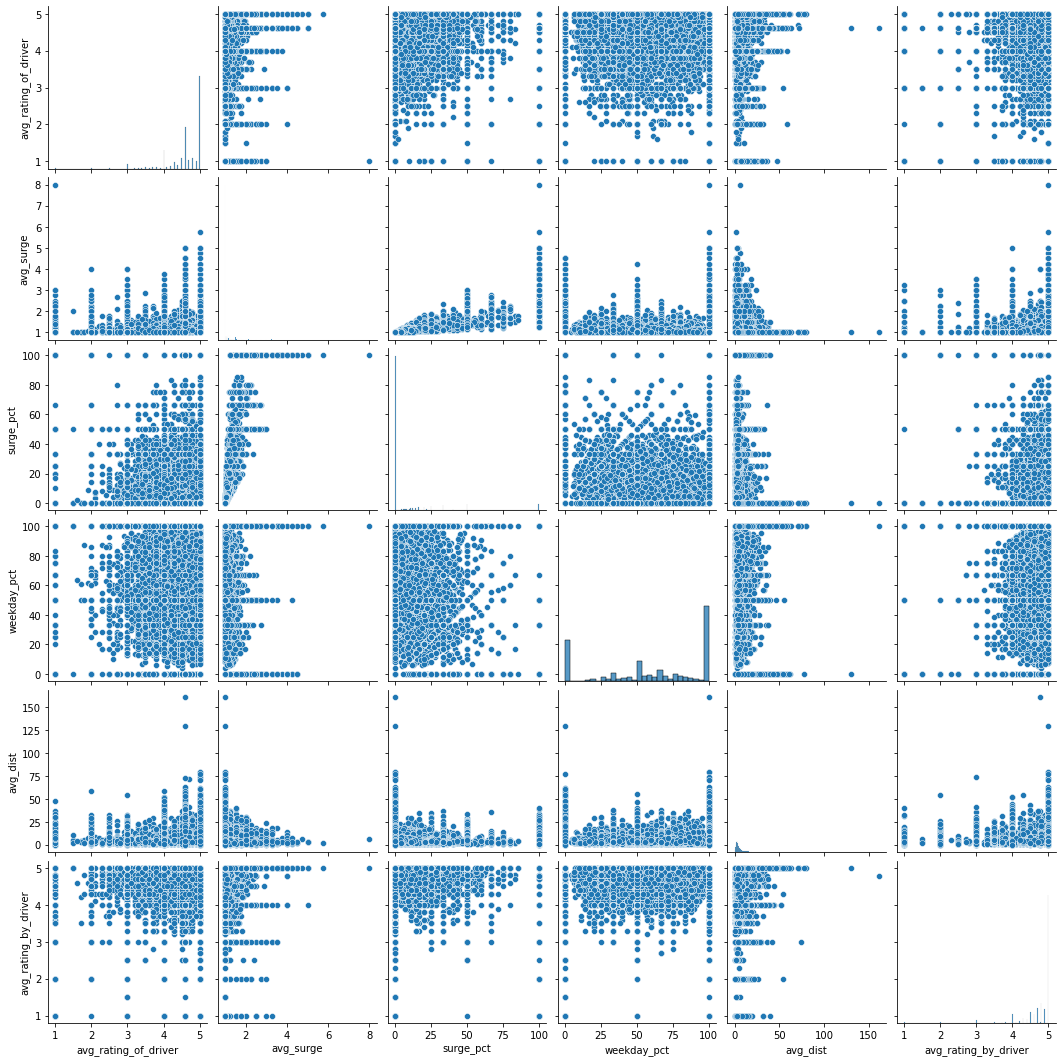

In [17]:
sns.pairplot(data=numerics_df)

<AxesSubplot:xlabel='count', ylabel='city'>

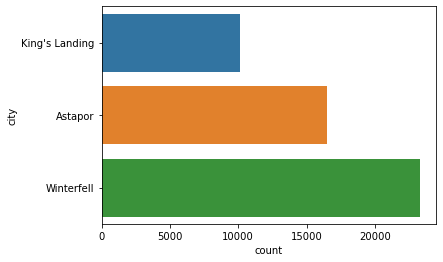

In [18]:
sns.countplot(data=df, y='city')

<AxesSubplot:xlabel='count', ylabel='phone'>

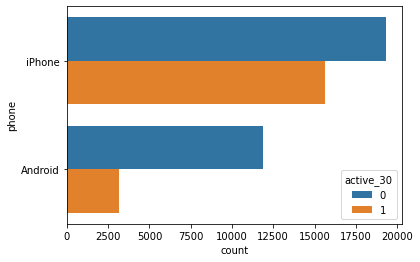

In [19]:
sns.countplot(data=df, y='phone', hue='active_30')

<AxesSubplot:xlabel='count', ylabel='city'>

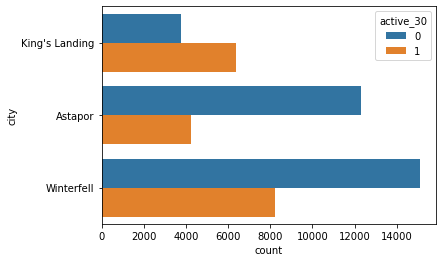

In [20]:
sns.countplot(data=df, y='city', hue='active_30')

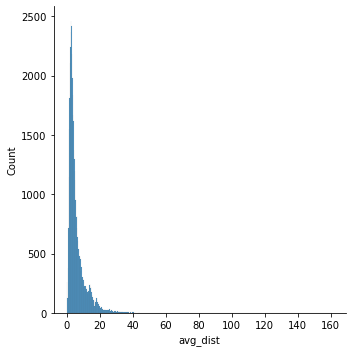

In [21]:
sns.set_style
sns.displot(df.avg_dist)
plt.show()

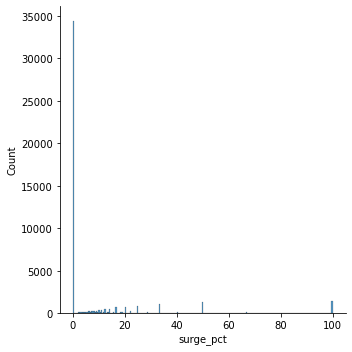

In [22]:
sns.set_style
sns.displot(df.surge_pct)
plt.show()

#### Data Preprocessing Step

In [23]:
df_processed = pd.get_dummies(df, columns = ['phone','city'])

In [24]:
df_processed

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_30,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.700000,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,1,0
1,0,5.000000,1.00,0.0,0,50.0,8.26,5.0,0,1,0,1,0,0
2,3,4.300000,1.00,0.0,0,100.0,0.77,5.0,0,0,1,1,0,0
3,9,4.600000,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,1,0
4,14,4.400000,1.19,11.8,0,82.4,3.13,4.9,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,0,100.0,5.63,4.2,1,0,1,0,1,0
49996,1,4.601559,1.00,0.0,0,0.0,0.00,4.0,0,0,1,1,0,0
49997,0,5.000000,1.00,0.0,1,100.0,3.86,5.0,0,1,0,0,0,1
49998,2,3.000000,1.00,0.0,0,100.0,4.58,3.5,0,0,1,1,0,0


In [25]:
X = df_processed.drop(columns=['active_30'])
y = df.active_30 

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int32  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   phone_Android           50000 non-null  uint8  
 9   phone_iPhone            50000 non-null  uint8  
 10  city_Astapor            50000 non-null  uint8  
 11  city_King's Landing     50000 non-null  uint8  
 12  city_Winterfell         50000 non-null  uint8  
dtypes: float64(6), int32(1), int64(1), uint8(5)
memory usage: 3.1 MB


#### Resample the minority class to make the model training more balanced

In [63]:
#SMOTE-NC looks for a mask to indicate which columns are categorical(True) and which are continuous (False)
## Link to Library: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html

from imblearn.over_sampling import SMOTENC
cat_mask =  np.array([True] * len(X.columns))
#Set the continuous variables to False state so the sampler knows how to handle them
cat_mask[[0,1,2,3,5,6,7]] = False
cat_mask

array([False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True])

In [64]:
sm = SMOTENC(random_state=42, categorical_features=cat_mask)
X_res, y_res = sm.fit_resample(X, y)

### 2 Model are considered, both tree based. XGBosot and Random Forest are chosen, neither requires feature scaling but feature modification such as one hot encoding is required.

#### Random Forest Classifier Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=30)




In [78]:
distributions = {'n_estimators': np.arange(100, 2000, 100),
                 'criterion'   : ['entropy', 'gini'],
                 'max_depth'   : np.arange(10,60),
                 'min_samples_leaf' : [2,5,10],
                 'min_samples_split' : [2,5,10],
                 'max_features' : ['auto', 'sqrt', 'log2'],
                 }

rfc = RandomForestClassifier()

clf = RandomizedSearchCV(rfc, param_distributions=distributions, n_iter = 4, n_jobs = -1, cv=5, verbose=4)

clf.fit(X_test, y_test)
clf.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 51,
 'criterion': 'entropy'}

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
best_random_rf = clf.best_estimator_
predictions = best_random_rf.predict(X_test)
score = best_random_rf.score(X_test, y_test)
print('Score: ', score)
f1 = f1_score(y_test, predictions, average='weighted')
f1
report = classification_report(y_test, predictions)
print(report)

Score:  0.8646526163955445
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6334
           1       0.87      0.85      0.86      6145

    accuracy                           0.86     12479
   macro avg       0.86      0.86      0.86     12479
weighted avg       0.86      0.86      0.86     12479



13


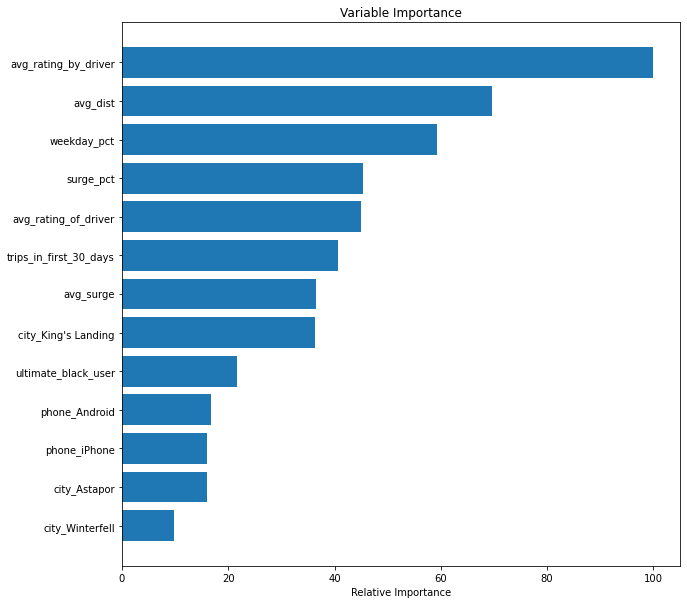

In [80]:
feature_importance = best_random_rf.feature_importances_
# make importances relative tox max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

explainer = shap.Explainer(best_random_rf)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values, max_display=20)

#### XGBoost Classifier Model

In [32]:
from xgboost import XGBClassifier

In [44]:
params = {
        'min_child_weight': [1, 5, 10, 15, 18],
        'gamma': [0.5, 1, 1.5, 2, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 9, 11],
        'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
        }

In [34]:
xgb = XGBClassifier( n_estimators=200, random_state = 42)
XGB_random = RandomizedSearchCV(estimator = xgb, param_distributions = params, n_iter = 500, cv = 5,
                                verbose=4, random_state=42, n_jobs = -1)
XGB_random.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=200,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [70]:
best_random = XGB_random.best_estimator_

In [71]:
predictions = best_random.predict(X_test)
score = best_random.score(X_test, y_test)
print('Score: ', score)
f1 = f1_score(y_test, predictions, average='weighted')
f1
report = classification_report(y_test, predictions)
print(report)

Score:  0.8238640916740123
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6334
           1       0.84      0.80      0.82      6145

    accuracy                           0.82     12479
   macro avg       0.82      0.82      0.82     12479
weighted avg       0.82      0.82      0.82     12479



13


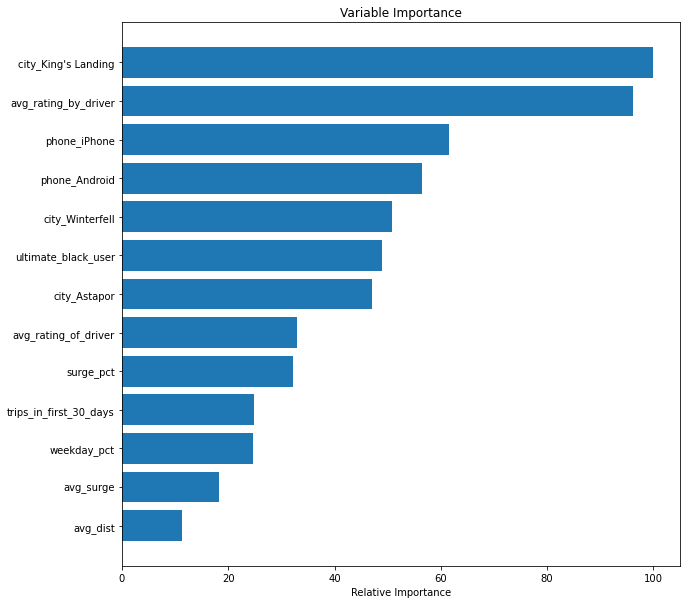

In [72]:
feature_importance = best_random.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [73]:
import shap

In [74]:
explainer = shap.Explainer(best_random)

In [75]:
shap_values = explainer(X_train)

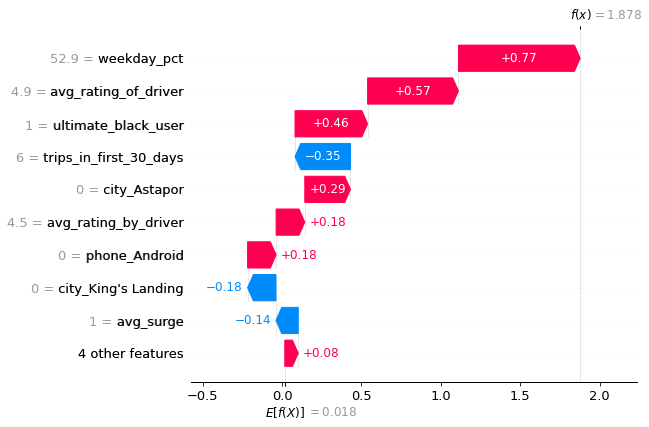

In [76]:
shap.plots.waterfall(shap_values[4])

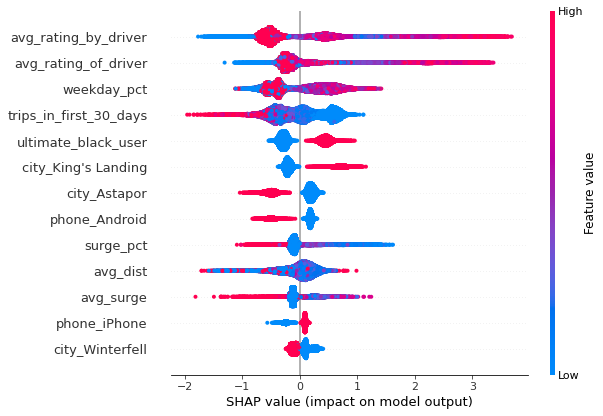

In [77]:
shap.plots.beeswarm(shap_values, max_display=20)

### Results:

The XGBoost model adequate performance and high explainability on this dataset and would be the one I select to move forward with on providing reccomendations. 

The top 5 features identified in the model are:
* average rating by driver
* average distance
* weekday percent
* surge percent
* average rating of driver

In order to move forward from here, I would reccomend the following:
* get new users to use the ultimate black service in the first 30 days, it posively impacts long term retention
* interestingly, users that ride less in the first 30 days are more likely to be retained
* riders who experience less surge pricing are more likely to be retained